# Neural Network Model based on MNIST Dataset from scratch

## Importing required Libraries and Dataset

In [1]:
# Importing the Libraries required
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random
import seaborn as sns

# Importing the Dataset
mnist = pd.read_csv(r'G:\ML Portfolio\Neural Networks\train.csv')

## Data Exploration


In [2]:
# Checking the amount of rows and columns inside the dataset 
mnist = np.array(mnist)
print(mnist.shape)

# Splitting the rows and the columns inside of the mnist dataset
m, n = mnist.shape
print(f"Rows : {m}\nColumns : {n}")

# Splitting and modifying the dataset into X feature dataset and y target dataset
mnist = mnist.T
X = mnist[1:n]
y = mnist[0]
X = X / 255.

print(X, y)

(42000, 785)
Rows : 42000
Columns : 785
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [1 0 1 ... 7 6 9]


## Neural Network

Epoch 0
[8 6 8 ... 7 7 1] [1 0 1 ... 7 6 9]
Accuracy : 0.10433333333333333


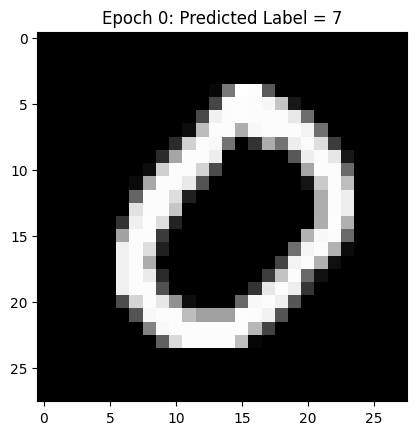

Epoch 20
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.6892857142857143


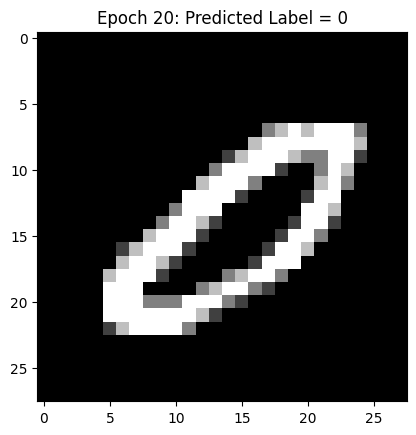

Epoch 40
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.7976190476190477


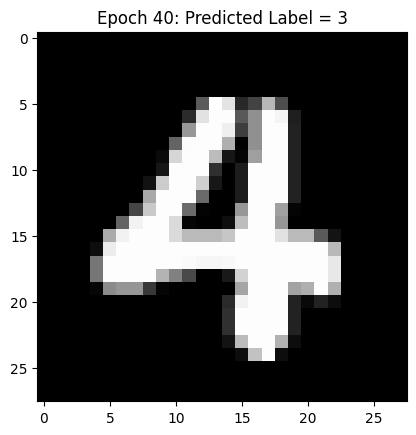

Epoch 60
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8345714285714285


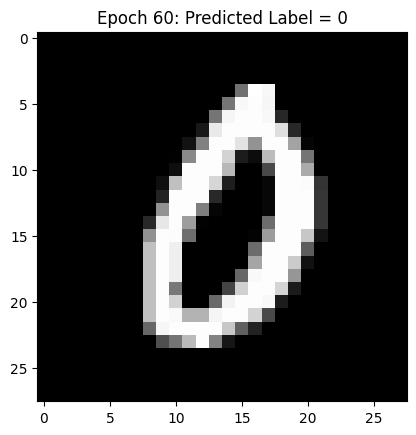

Epoch 80
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8572142857142857


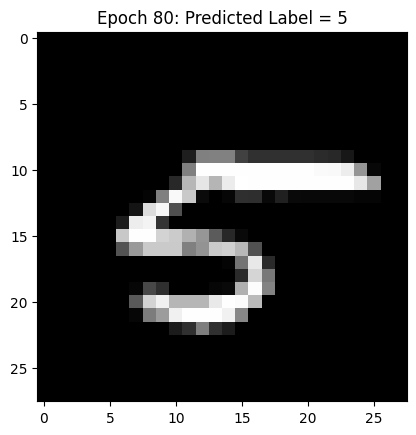

Epoch 100
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8684761904761905


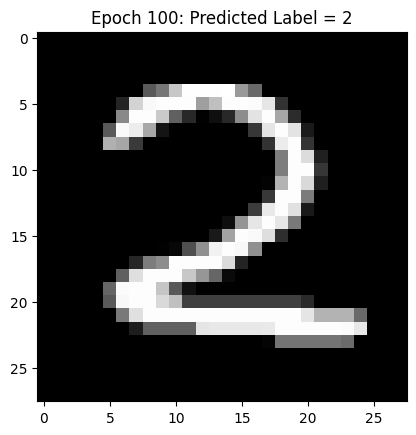

Epoch 120
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8835952380952381


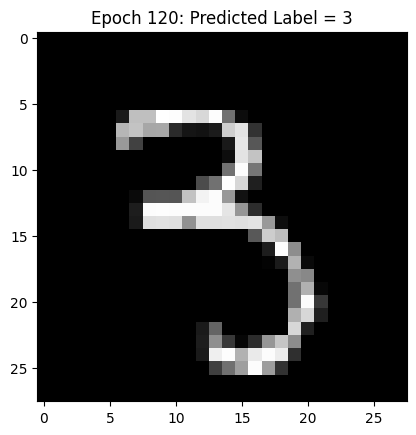

Epoch 140
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8908571428571429


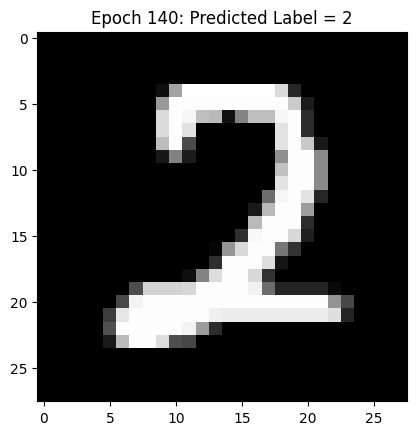

Epoch 160
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.8976904761904761


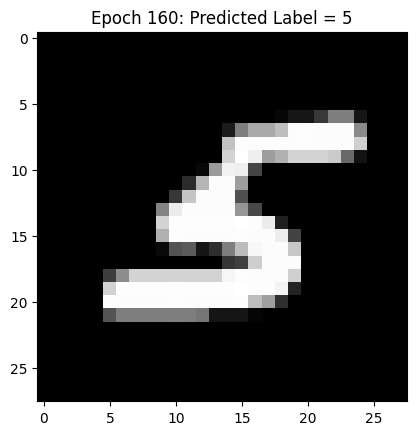

Epoch 180
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9047380952380952


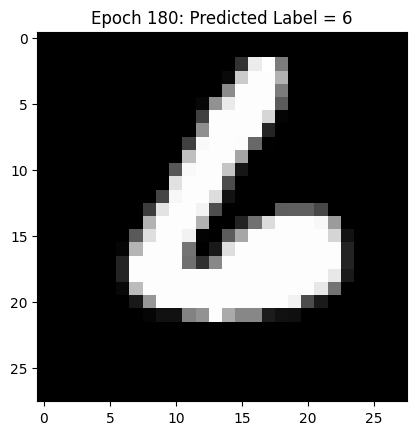

Epoch 200
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9102857142857143


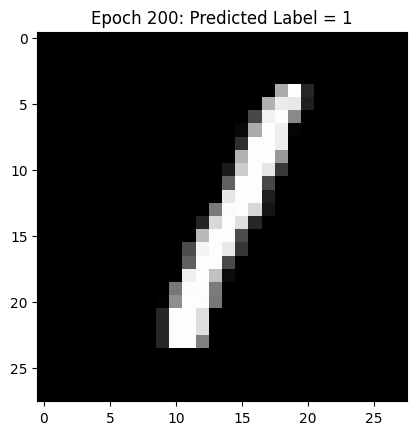

Epoch 220
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9143095238095238


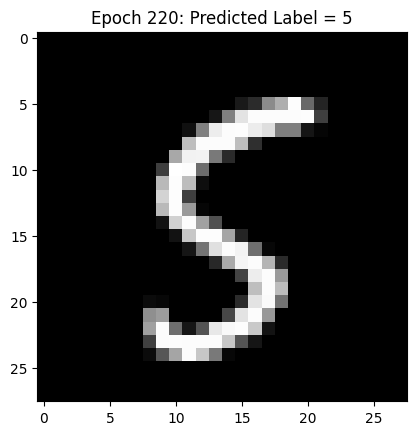

Epoch 240
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.918047619047619


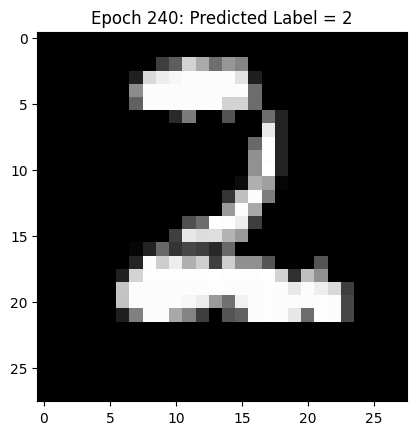

Epoch 260
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9217142857142857


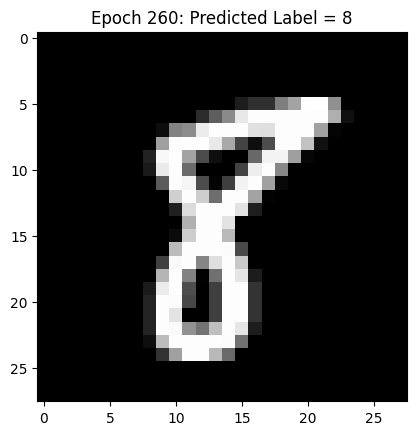

Epoch 280
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9245714285714286


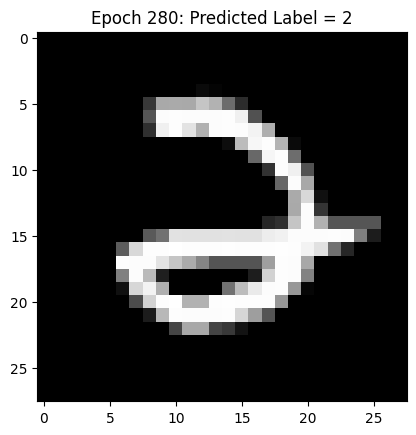

Epoch 300
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9272380952380952


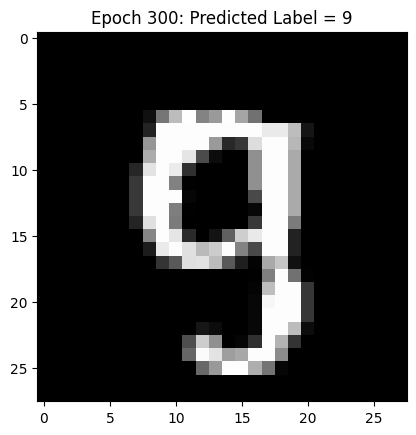

Epoch 320
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9302380952380952


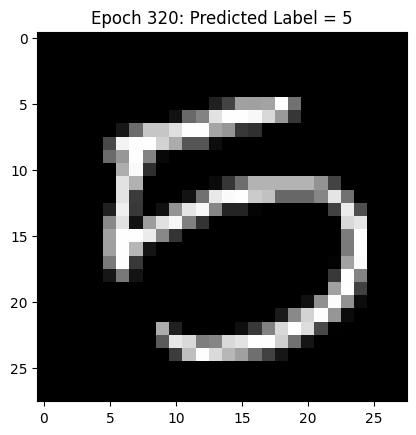

Epoch 340
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9323095238095238


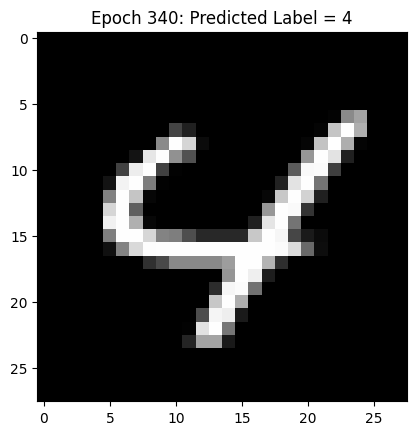

Epoch 360
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9341666666666667


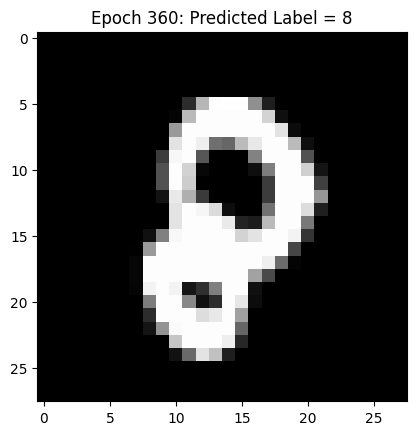

Epoch 380
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9360952380952381


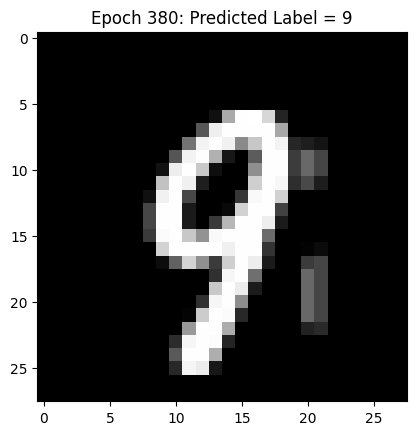

Epoch 400
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.938047619047619


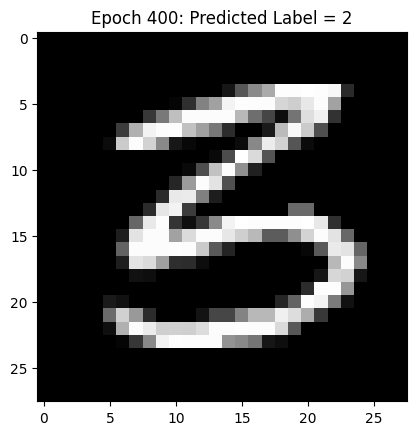

Epoch 420
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9392142857142857


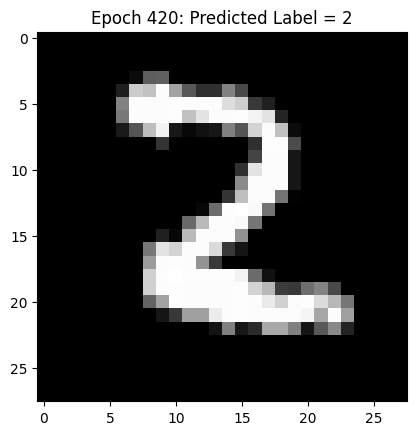

Epoch 440
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9407857142857143


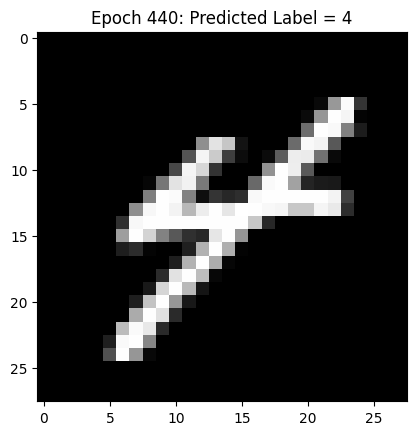

Epoch 460
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9423571428571429


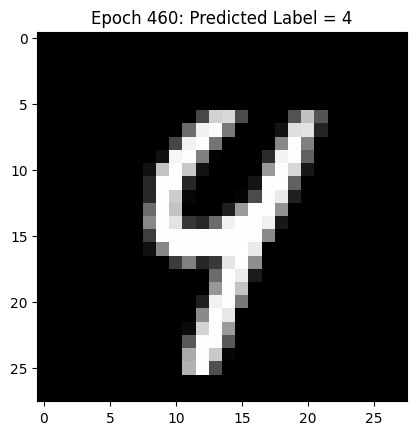

Epoch 480
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy : 0.9436904761904762


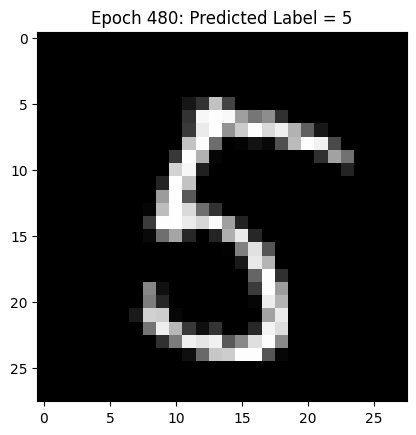

In [6]:
class NeuralNetwork():

    def __init__(self, X, y, m, n, alpha, epochs):
        self.X = X
        self.y = y
        self.m = m
        self.n = n
        self.alpha = alpha
        self.epochs = epochs
        self.input_layer = 784
        self.hl_1 = 128
        self.hl_2 = 64
        self.output_layer = 10
        self.parameter_init()

    def parameter_init(self):
        self.w1 = np.random.rand(self.hl_1, self.input_layer) - 0.5 
        self.b1 = np.random.rand(self.hl_1, 1) - 0.5
        self.w2 = np.random.rand(self.hl_2, self.hl_1 ) - 0.5
        self.b2 = np.random.rand(self.hl_2, 1) - 0.5
        self.w3 = np.random.rand(self.output_layer ,self.hl_2) - 0.5
        self.b3 = np.random.rand(self.output_layer, 1) - 0.5
        self.train()
        
    def ReLU(self, z):
        return np.maximum(z, 0)
    
    def softmax(self, z):
        softmax = np.exp(z) / sum(np.exp(z))
        return softmax
    
    def forward_prop(self):
        self.z1 = self.w1.dot(self.X) + self.b1
        self.a1 = self.ReLU(self.z1)
        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = self.ReLU(self.z2)
        self.z3 = self.w3.dot(self.a2) + self.b3
        self.a3 = self.softmax(self.z3)
        self.backward_prop()

    def ReLU_backward(self, z):
        return z > 0 
    
    def one_hot_encoder(self, y):
        one_hot = np.zeros((y.size, y.max() + 1))
        one_hot[np.arange(y.size), y] = 1
        one_hot = one_hot.T
        return one_hot
    
    def backward_prop(self):
        self.dZ3 = self.a3 - self.one_hot_encoder(self.y)
        self.dW3 = 1 / self.m * self.dZ3.dot(self.a2.T)
        self.dB3 = 1 / self.m * np.sum(self.dZ3, axis=1, keepdims=True)
        self.dZ2 = self.w3.T.dot(self.dZ3) * self.ReLU_backward(self.a2)
        self.dW2 = 1 / self.m * self.dZ2.dot(self.a1.T)
        self.dB2 = 1 / self.m * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dZ1 = self.w2.T.dot(self.dZ2) * self.ReLU_backward(self.a1)
        self.dW1 = 1 / self.m * self.dZ1.dot(self.X.T)
        self.dB1 = 1 / self.m * np.sum(self.dZ1, axis=1, keepdims=True)
        self.parameter_upd()

    def parameter_upd(self):
        self.w1 = self.w1 - self.alpha * self.dW1
        self.b1 = self.b1 - self.alpha * self.dB1
        self.w2 = self.w2 - self.alpha * self.dW2
        self.b2 = self.b2 - self.alpha * self.dB2
        self.w3 = self.w3 - self.alpha * self.dW3
        self.b3 = self.b3 - self.alpha * self.dB3 
    
    def predict(self, a2):
        return np.argmax(a2, 0)

    def get_accuracy(self, predictions, y):
        print(predictions, y)
        return np.sum(predictions == y) / y.size
    
    def plot(self, epoch):
        index = np.random.randint(0, self.X.shape[1])
        example_image = self.X[:, index].reshape(28, 28)
        predicted_label = self.predict(self.a3[:, index])
        
        plt.imshow(example_image, cmap='gray')
        plt.title(f"Epoch {epoch}: Predicted Label = {predicted_label}")
        plt.show()        

    def train(self):
        for epoch in range(self.epochs):
            self.forward_prop()
            predictions = self.predict(self.a3)
            if epoch % 20 == 0:
                print(f"Epoch {epoch}")
                print(f"Accuracy : {self.get_accuracy(predictions, self.y)}")
                self.plot(epoch)

NeuralNetwork(X=X, y=y, m=m, n=n, alpha=0.3236, epochs=500)